# 주성분 분석의 기초
<!-- 9-1 -->

사용 패키지의 로드
- numpy: 행렬 및 선형대수 관련 연산 수행
- matplotlib, matplotlib.pyplot: 시각화 도구
- sklearn.preprocessing.StandardScaler: 데이터 표준화 함수
- sklearn.decomposition.PCA: 주성분분석 도구

 cf) matplotlib.rcParams: 시각화 실행시 설정 변수 (runtime configuration parameter) 변수로 값을 변경함으로써 폰트, 색상등을 조절할 수 있습니다.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

1. 좌표계와 벡터의 차이

- 2차원 평면에 두개의 점(red, blue)을 표시할 것입니다. 이 점은 평면상의 위치를 나타냅니다.

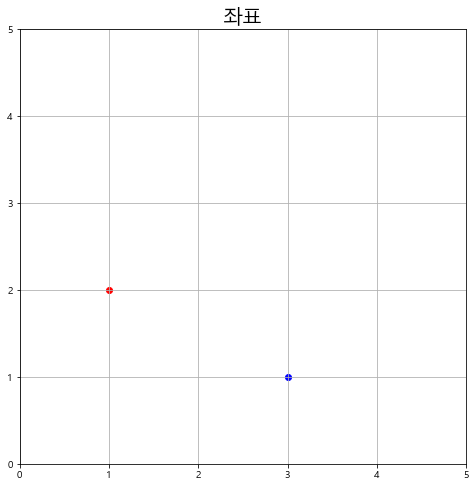

In [3]:
a = np.array([1, 2])
b = np.array([3, 1])

# 좌표
plt.figure(figsize = (8, 8))
plt.title('좌표', fontsize = 20)
plt.scatter(a[0], a[1], color = 'red')
plt.scatter(b[0], b[1], color = 'blue')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid()
plt.show()
plt.close()

이 평면상의 점들을 벡터로 이해할 때 흔히 화살표를 사용하여 표시합니다. 이 두 점을 화살표를 이용해서 표시합니다.
- plt.arrow 는 첫번째 네 개의 입력값을 (출발x, 출발y, 변화량x, 변화량y)를 받습니다.
- 아래 예제에서 첫번째 네 개의 좌표 입력값을 확인하고 값을 변경하여 시각화 결과물의 변화를 확인하세요.
- 예제에 사용한 다른 option의 값을 변경하면서 시각화 결과물의 변화를 확인하세요.

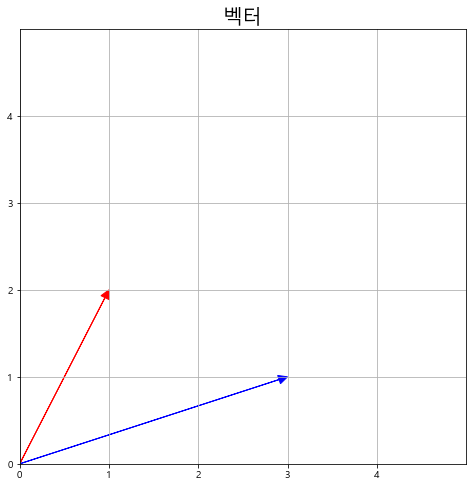

In [4]:
# 벡터
plt.figure(figsize = (8, 8))
plt.title('벡터', fontsize = 20)
plt.arrow(0, 0, a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0, 0, b[0], b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(ticks = np.arange(0, 5, step = 1))
plt.yticks(ticks = np.arange(0, 5, step = 1))
plt.grid()
plt.show()
plt.close()

여기서 가져야할 의문점은 "점을 사용한 위치좌표계와 화살표를 사용한 벡터공간의 차이점은 무엇인가?"입니다.

- 연산에 대한 체계가 위치만을 표시하는 집합(set)위에서 정의됩니다. 
- 하지만 위치의 이동, 상대적인 위치, 두 개의 위치간의 거리와 같은 더 많은 유용한 개념들을 도입하기 위해서는 집합 위에 정의된 시스템이 필요하다. 예를 들어 집합만 있을 때는 위치에 대한 개념만 있어서 점(point)만 필요했는데, 연산(addition, scalar multiplication)이 시스템으로 들어오면서 연산과정 혹은 연산의 결과를 잘 나타낼 수 있는 시각적인 도구(화살표)가 도입된 것이다.

In [5]:
a + b

array([4, 3])

위 a+b의 결과를 숫자로 표시한 경우 계산 결과만의 의미를 가지고 있지만, 좌표계에서 화살표로 연산의 과정을 표시할 때 그 과정을 체계적으로 분석할 수 있습니다.
- 오렌지색 화살표는 벡터 $a = (1,2)$, 하늘색 화살표는 벡터 $b=(3,1)$을 나타냅니다.
- 우리는 벡터의 더하기 연산을 이용하여 $a + b$가 $(4,3)$이란 것을 알고 있습니다.
- 여기서 $c = a+b$라 놓고 빨간색 화살표로 벡터 $c$를 표시해보겠습니다.

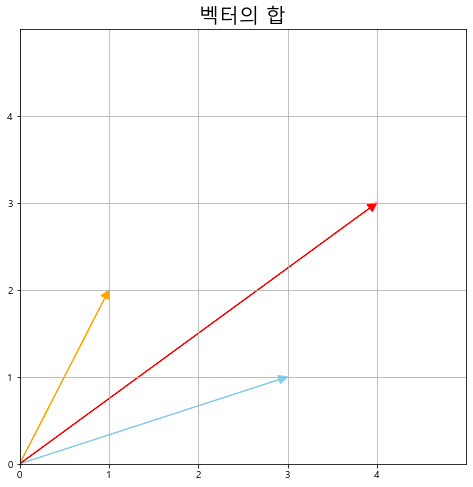

In [11]:
plt.figure(figsize = (8, 8))
plt.title('벡터의 합', fontsize = 20)
plt.arrow(0, 0, a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(0, 0, b[0], b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.arrow(0, 0, a[0] + b[0], a[1] + b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(ticks = np.arange(0, 5, step = 1))
plt.yticks(ticks = np.arange(0, 5, step = 1))
plt.grid()


이번에는 계산의 과정을 벡터 화살표로 표시하겠습니다.
$$c = a + b$$
- 먼저 오렌지색 화살표는 벡터 $a$를 나타내며 원점에서 좌표 $a$까지 이동했다고 상상해봅시다.
- 여기서 벡터 $b$를 $a$에 더한다는 것은 좌표 $a$로 부터 $b$방향으로 이동의 결과와 같을 것입니다.
- 이 과정을 화살표로 표현한 그림을 통해서 한번 살펴보도록 하겠습니다.

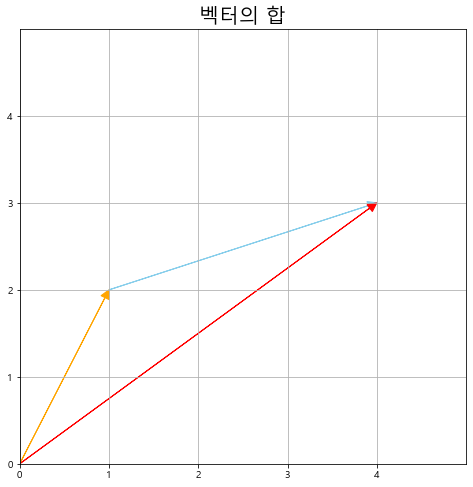

In [15]:
plt.figure(figsize = (8, 8))
plt.title('벡터의 합', fontsize = 20)
plt.arrow(0, 0, a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(a[0], a[1], b[0], b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.arrow(0, 0, a[0] + b[0], a[1] + b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(ticks = np.arange(0, 5, step = 1))
plt.yticks(ticks = np.arange(0, 5, step = 1))
plt.grid()


In [ ]:
이번에는 계산의 과정을 벡터 더하기 연산의 교환법칙을 화살표로 확인해보겠습니다.
$$c = a + b = b + a$$
- 여기서 벡터 $a$를 $b$에 더한다는 것은 좌표 $b$로 부터 $a$방향으로 이동의 결과와 같을 것입니다.
- 이 과정을 화살표로 표현한 그림을 통해서 한번 살펴보도록 하겠습니다.

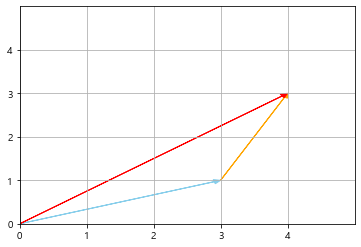

In [16]:

plt.arrow(0, 0, b[0], b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.arrow(b[0], b[1], a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(0, 0, a[0] + b[0], a[1] + b[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xticks(ticks = np.arange(0, 5, step = 1))
plt.yticks(ticks = np.arange(0, 5, step = 1))
plt.grid()
plt.show()
plt.close()

벡터의 스칼라 곱에 대한 시각화를 연습해봅시다.
- $2a$
- $-a$

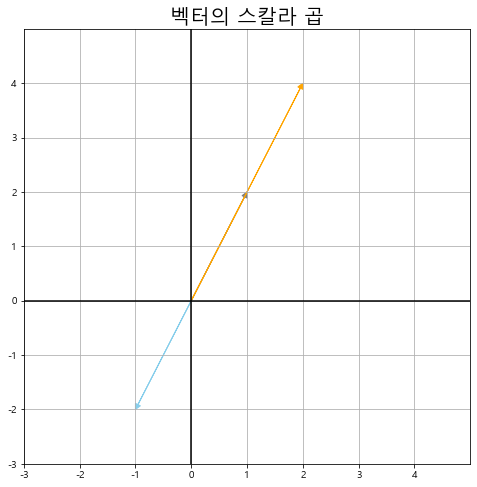

In [17]:
plt.figure(figsize = (8, 8))
plt.title('벡터의 스칼라 곱', fontsize = 20)
plt.arrow(0, 0, a[0], a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'gray')
plt.arrow(0, 0, 2*a[0], 2*a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'orange')
plt.arrow(0, 0, -1*a[0], -1*a[1], head_width = .1, head_length = .1, length_includes_head = True, color = 'skyblue')
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.xticks(ticks = np.arange(-3, 5, step = 1))
plt.yticks(ticks = np.arange(-3, 5, step = 1))
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.show()
plt.close()

이차원 상의 모든 점은 기저벡터들의 선형결합으로 표현할 수 있습니다. 아래는 특별한 기저 벡터 두 개를 표시한 그림입니다. 임의 벡터 (a,b)를 이 기저벡터로 표시해봅시다.

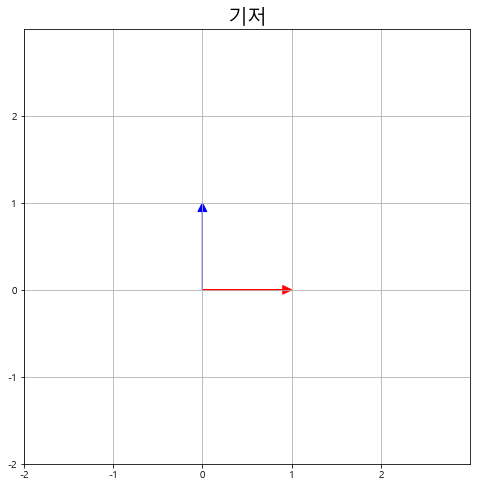

In [10]:
plt.figure(figsize = (8, 8))
plt.title('기저', fontsize = 20)
plt.arrow(0, 0, 1, 0, head_width = .1, head_length = .1, length_includes_head = True, color = 'red')
plt.arrow(0, 0, 0, 1, head_width = .1, head_length = .1, length_includes_head = True, color = 'blue')
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.xticks(ticks = np.arange(-2, 3, step = 1))
plt.yticks(ticks = np.arange(-2, 3, step = 1))
plt.grid()
plt.show()
plt.close()

여기서는 데이터를 벡터로 표시하고 이해하는 방법에 대해 알아봅니다. 임의의 데이터 행렬 
$X\in \mathbb{R}^{n \times p}$ (n행 p열 데이터 행렬)이 주어져 있다고 가정합시다.
- 각 행($x_i^\top \in \mathbb{R}^p$)은 관측치를 나타냅니다. $i$번째 행벡터를 가져오면 $i$번째 관측치 데이터가 됩니다. (참고: 여기서 열벡터로 통일된 표현을 위해서 $x_i^\top$와 같이 transpose 기호를 사용하였습니다)
- 각 열($X_j \in \mathbb{R}^n$)은 변수를 나타냅니다.
- 예) 120명의 환자를 대상으로 나이, 성별, 10가지 건강검진 결과를 기록한 데이터 행렬을 생각해보면, 이 데이터 행렬은 n=120, p=12 로 주어져 있습니다. 

데이터를 벡터공간에 표시하는 방법은 세 가지입니다.
- 행 벡터를 벡터공간의 원소로 이해하는 방법 (데이터 간의 거리, 산포, 군집화에 대한 시각화)
- 열 벡터를 벡터공간의 원소로 이해하는 방법 (변수들 간의 관계, 차원 축약에 대한 시각화)
- 데이터를 선형변환(linear map)으로 이해하는 방법 (차원 축약)

먼저 우리는 데이터 행렬을 선형변환으로 이해하고 시각화 하는 방법을 살펴보겠습니다.

행렬을 선형변환으로 다루기 위해 세 개의 $n\times p$ 행렬을 정의해보겠습니다. 이 행렬들은 데이터 행렬일 필요가 없으며 잠시 데이터 행렬에 대한 생각을 뒤로 미루도록 하겠습니다.
$$ C = A + B$$

In [15]:
# 행렬의 덧셈과 곱셈
A = np.random.exponential(size = (n, p))
B = np.random.uniform(size = (n, p))
C = A + B
# 입력벡터로서 bvec
x = np.random.uniform(size = (p, 1))

당연하게도 우리는 $Ax$, $Bx$, $Cx$값을 행렬의 곱셈연산을 통해 계산할 수 있습니다. 여기서 행렬을 다음과 같은 map으로 간주해봅시다.
$$A:x \in \mathbb{R}^p \mapsto Ax \in \mathbb{R}^n$$

- 재미있는 것은 $n \times p$ 행렬인 $A,B,C$ 행렬 모두 입력공간이 $\mathbb{R}^p$, 출력공간이 $\mathbb{R}^n$인 map이라는 것입니다. 
- 이 map은 선형성을 만족하는 특별한 map이기도 합니다.
    - $A0 = 0$
    - $A(\alpha x + \beta x') =\alpha A x + \beta A x' $

이러한 이유로 행렬을 선형변환(linear map)이라고 부르기도 합니다. 

아래는 선형변환으로 성질 중 $A+B$로 정의한 선형변환 $C$의 성질을 이해하기 위해 출력값을 확인하는 예입니다.

In [16]:
print("Ax+Bx=",A@x + B@x)
print("Cx=",C@x)

Ax+Bx= [[4.5320103 ]
 [4.76165225]
 [4.19676325]
 [2.74026979]
 [4.54889027]
 [2.51473937]
 [4.3253096 ]
 [3.36702811]
 [1.75103652]
 [3.30512356]]
Cx= [[4.5320103 ]
 [4.76165225]
 [4.19676325]
 [2.74026979]
 [4.54889027]
 [2.51473937]
 [4.3253096 ]
 [3.36702811]
 [1.75103652]
 [3.30512356]]


한편 데이터 행렬 $X$와 계수벡터 $b$의 곱 즉 행렬 $X$가 입력값 $\beta$를 받아서 출력한 값인 $X\beta$를 조금 다른 관점으로 이해할 수 있습니다. 이 출력값은 $X$ 열벡터의 선형결합으로 이해할 수 있습니다. 특별히 각 열벡터의 가중치가 $\beta$의 원소값이 됩니다.
$$Y = X\beta \in \mathbb{R}^n$$

이제 $n\times p$행렬 $X$를 데이터 행렬로 놓고 분석해봅시다.

In [18]:
# 행렬의 이미지
n = 10
p = 5
np.random.seed(1)
x = np.random.normal(size = (n, p))
beta = np.random.uniform(size = (p, 1))
y = x @ beta

y가 $\sum_{j=1}^p \beta_j X_j$로 표현됨을 확인할 수 있습니다. 이 결과는 $y = X\beta$가 열벡터 $X_j$들의 선형결합으로 표현되며 $X\beta$가 $X$ 열벡터가 속한 (혹은 생성하는) 선형공간의 원소임을 의미합니다. 

- 위 내용을 그림으로 표현해봅시다. (힌트: $X$ 열벡터가 화살표에 대응하며, 선형결합은 스칼라곱과 더하기로 표현할 수 있습니다)

In [20]:
# columnwise operation
z = np.zeros(n)
for i in range(p):
    z += x[:, i] * beta[i]
z = z.reshape(-1, 1)

np.concatenate((y, z), axis = 1)

array([[ 0.7876209 ,  0.7876209 ],
       [-1.78694454, -1.78694454],
       [ 1.13354049,  1.13354049],
       [-0.87375819, -0.87375819],
       [ 0.05259844,  0.05259844],
       [-0.77028632, -0.77028632],
       [-1.72444884, -1.72444884],
       [ 1.50280902,  1.50280902],
       [ 0.98728556,  0.98728556],
       [ 0.0857615 ,  0.0857615 ]])

여기서 우리는 선형 회귀분석에서 다루는 모형을 추상적인 공간위에서 생각할 수 있습니다.
$$E(Y|X) = X\beta$$
위 식은 선형회귀모형의 모형가정을 식으로 표현한 것입니다.
- $E(Y|X)$는 반응변수의 평균입니다.
- $X\beta$는 선형회귀모형을 나타냅니다. 
- 이 등식은 $n$차원 반응변수의 평균이 열벡터의 선형결합으로 표현됨을 의미하며 모형의 가정에 의해서 $n$차원 반응변수 평균은 기껏해야 $p$차원 공간 위에 있음을 알 수 있습니다.

### 차원 축약과 축약방법의 선택

먼저 다변량정규분포를 따르는 데이터를 생성해자.

In [24]:
## 2. 차원 축약과 축약방법 선택
n = 100
p = 5
np.random.seed(2)
e = np.random.normal(loc = 0, scale = 1, size = (n, p))
A = np.random.normal(size = (5,5))
x = e@A
A

array([[ 0.24685751, -1.4687758 ,  1.14709994,  0.09555698, -1.10743873],
       [-0.17628614, -0.98275567,  2.08668273, -0.34462367, -2.00207923],
       [ 0.30323443, -0.82987484,  1.28876941,  0.13492546, -1.77860064],
       [-0.50079149, -1.08816157, -0.75785555, -0.6437449 , -2.00878453],
       [ 0.19626289, -0.87589637, -0.89360921,  0.75190236,  1.89693224]])

$$X \sim MNV(0, A^\top A)$$

In [25]:

scaled_x = StandardScaler(with_std=False).fit_transform(x)

sklearn.preprocessing 에 있는  StandardScaler.fit_transform()을 이용하여 data standardization 을 수행합니다.

In [26]:
print("location:",scaled_x.mean(axis = 0))
print("scaling:",scaled_x.std(axis = 0))

location: [-1.16573418e-17 -9.76996262e-17  1.36002321e-16 -9.76996262e-17
  3.31401573e-16]
scaling: [0.70364493 2.43951371 3.06259636 1.18449753 4.27999892]


먼저 완전한 데이터 행렬의 열공간에서 표현능력 (representation power)를 정의합니다.
- 데이터 $X$의 표현능력은 계수행렬에 대한 반응치 $X\beta$의 변화로 정의할 수 있습니다. 다양한 $\beta$에 대해 $X\beta$의 값의 변화가 크게 나타날 수 있는 경우 $X$의 표현력이 크다고 하겠습니다.
- $X\beta$는 비록 $n$차원 공간의 원소지만 실제로 $p$개의 열벡터의 선형결합이므로 $X\beta$가 속한 공간의 크기는  $p$차원보다 작거나 같음을 알 수 있습니다. 
- $X\beta$가 모든 $\beta$에 대해 한점이라면 $X$의 표현능력은 0이라고 볼 수 있습니다.
- 길이가 1인 벡터 $\beta$에 대해 $\|X\beta\|$의 크기를 벡표터 $\beta$방향으로 $X$의 표현능력이라고 할 수 있습니다. 다만, 표현능력이라는 것이 단 하나의 숫자로 나타내기는 어려운데 이는 하나의 벡터로 설명할 수 있는 방향이 오직 1차원이기 때문입니다.
$$\text{representation power}=\sup_{\beta}\frac{\|X\beta\|}{\|\beta\|}$$
- 표현능력이 큰 $\beta$ 방향이 있을 것인데, 이는 $X$의 열벡터를 $\beta$ 원소의 가중치로 선형결합해서 나온 새로운 변수가 표현능력이 크다는 것을 의미합니다. (제1 주성분라고 부릅니다)

In [27]:
beta = np.random.uniform(size = (p, 1))
y = x @ beta

- 주성분 분석은 $X$의 표현력이 큰 방향을 차례대로 찾는 방법론 입니다.(X는 열평균이 0인 상황을 가정한다)
- 차례대로 찾는 다는 것은 먼저 찾은 표현력이 큰 방향이 있는 경우 해당 방향과 직교하는 방향들 중에 표현력이 큰 방향을 찾아가는 순차적 절차를 의미합니다.
- 대표적으로 주성분 방향은 sklearn의 PCA()를 이용하여 찾을 수 있습니다.
- 여기서는 $p=5$인 상황에서 설명력이 큰 방향 5개 모두 찾아보겠습니다. (최대 개수가 $p=5$)

$$X^\top X/n = EDE^\top$$

In [28]:
# 주성분 벡터 찾기
pca = PCA(n_components=5)
pca.fit(scaled_x)

PCA(n_components=5)

- 설명력이 강한 방향은 $p$개의 변수들의 선형결합으로 표현되며, 데이터 행렬이 어떤 변수의 조합들로 표현능력이 극대화되는지 확인할 수 있습니다.
- 설명력이 가장 강한 방향은 $E$행렬의 첫번째 열을 확인하면 됩니다. PCA 결과로는  'pca.components_.transpose()'의 첫번째 열의 값을 확인합니다.  

In [29]:
# eigen matrix (E[:,0:4])
E=pca.components_.transpose()
# for simplicity 
E = np.round(E,2)
E

array([[ 0.03, -0.25,  0.03,  0.72,  0.65],
       [ 0.33,  0.24, -0.88,  0.21, -0.12],
       [-0.47, -0.73, -0.43, -0.23,  0.01],
       [ 0.14, -0.37,  0.18,  0.52, -0.74],
       [ 0.81, -0.45,  0.07, -0.34,  0.16]])

In [30]:
print("설명력이 가장 큰 변수: {}X1+{}X2+{}X3+{}X4+{}X5".format(E[0,0], E[1,0], E[2,0], E[3,0], E[4,0]))

설명력이 가장 큰 변수: 0.03X1+0.33X2+-0.47X3+0.14X4+0.81X5


In [36]:
# eigenvalue
pca.explained_variance_.sum()


35.90632823755281

In [32]:
# 설명력
pca.explained_variance_ratio_

array([7.45926179e-01, 1.44032530e-01, 1.02263089e-01, 7.29642857e-03,
       4.81773820e-04])

In [33]:
# 누적 설명력
np.cumsum(pca.explained_variance_ratio_)

array([0.74592618, 0.88995871, 0.9922218 , 0.99951823, 1.        ])

- pca component는 데이터의 표현형을 나타내는 것으로 데이터 열벡터의 조합을 어떻게 하면 표현력이 좋아지는지 계수정보를 제공합니다.
- 한편 표현형이 우수한 조합을 이용해 데이터를 재표현할 수 있을 것입니다. 예를 들어 신체의 발달상태를 나타내는 좋은 변수로 BMI 식이 데이터 표현형이라면 어떤 사람의 BMI를 계산하는 것은 데이터를 BMI로 재표현하는 것으로 이해하면 됩니다.
- 데이터의 재표현 값을 PCA score 라 흔히 부르며 fit_transform() 함수를 이용하여 구할 수 있습니다. 아래 예시는 주요한 데이터 표현형 2개에 대해서 데이터를 재표현한 결과입니다.


In [34]:
pc_score = pca.fit_transform(scaled_x)

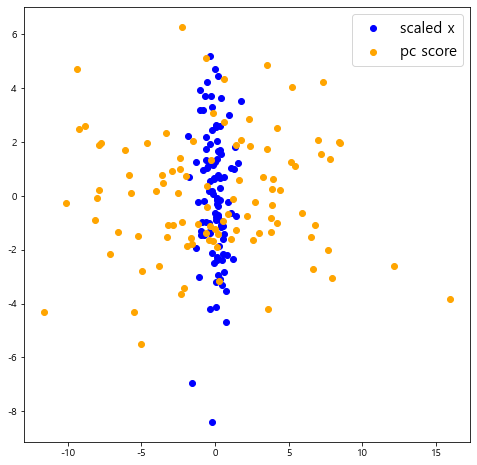

In [35]:

plt.figure(figsize = (8, 8))
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], color = 'blue', label = 'scaled x')
plt.scatter(pc_score[:, 0], pc_score[:, 1], color = 'orange', label = 'pc score')
plt.legend(fontsize = 15)
plt.show()
plt.close()